使用到的套件們

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.utils import np_utils
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

讀檔並分別令為train, test data

In [2]:
train = pd.read_excel("DRtraining.xlsx")
test = pd.read_excel("DRpredict.xlsx")

train = pd.DataFrame(train)
test = pd.DataFrame(test)

將資料分為X,y
並把y label的dummy variable轉回1個column，方便後續計算正確率

In [3]:
label = ['Target0', 'Target1', 'Target2', 'Target3', 'Target4', 'Target5', 'Target6', 'Target7', 'Target8', 'Target9' ]
Y_train = train[label]

nY_train = []

for i in range(len(Y_train)):
    judge = False
    for j in range(10):
        if Y_train.iloc[i][j]==1:
            nY_train.append(j)
            judge = True

X_train = train.drop(labels = label ,axis = 1) 
X_train = X_train.drop(labels = "No." ,axis = 1) 

X_test = test.drop(labels = label ,axis = 1) 
X_test = X_test.drop(labels = "No." ,axis = 1) 

把 X,y 資料以 9:1 的比例分為 train, test dataset

In [4]:
X_train, X_val, nY_train, nY_val = train_test_split(X_train, nY_train, test_size = 0.1, random_state=0)

cY_train = to_categorical(nY_train, num_classes = 10)
cY_val = to_categorical(nY_val, num_classes = 10)

### (a) For BPN, try to investigate the effects of changing “PARAMETERS” such as learning rates, momentum, # of hidden units, # of hidden layers, etc.

In [5]:
def BPN(LearningRate, Momentum, HiddenUnit, comparison):
    print("LearningRate=", LearningRate,"Momentum=", Momentum,"HiddenUnit=", HiddenUnit)
    
    #根據LearningRate, Momentum, HiddenUnit訓練模型
    model = Sequential()

    model.add(Dense(HiddenUnit, activation='relu', input_dim=256))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    sgd = SGD(lr=LearningRate, decay=1e-6, momentum=Momentum, nesterov=True)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, cY_train, validation_data=(X_val, cY_val), epochs=30 , batch_size=200, verbose=0)

    #分別繪出loss,val_loss和accuracy, val_accuracy對應epcho的圖
    fig, ax = plt.subplots(2,1)
    ax[0].plot(history.history['loss'], color='b', label="Training loss")
    ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
    legend = ax[0].legend(loc='best', shadow=True)
    
    ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    legend = ax[1].legend(loc='best', shadow=True)

    comparison.append([LearningRate, Momentum, HiddenUnit, history.history['loss'][-1],history.history['val_loss'][-1],\
                     history.history['accuracy'][-1],history.history['val_accuracy'][-1]])
    plt.show()
    print("last Val_Accuracy = ",history.history['val_accuracy'][-1])
    print('\n')

LearningRate= 0.01 Momentum= 0.9 HiddenUnit= 128


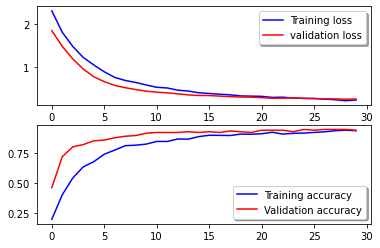

last Val_Accuracy =  0.9430379867553711


LearningRate= 0.01 Momentum= 0.9 HiddenUnit= 64


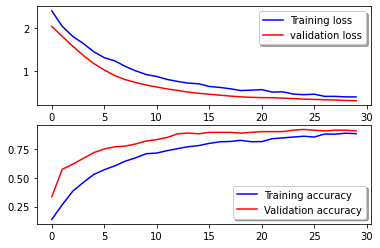

last Val_Accuracy =  0.9113923907279968


LearningRate= 0.01 Momentum= 0.9 HiddenUnit= 32


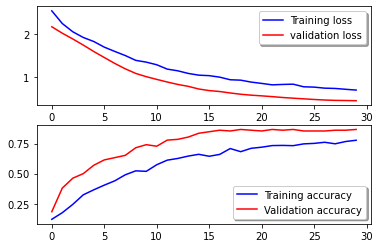

last Val_Accuracy =  0.8670886158943176


LearningRate= 0.01 Momentum= 0.7 HiddenUnit= 128


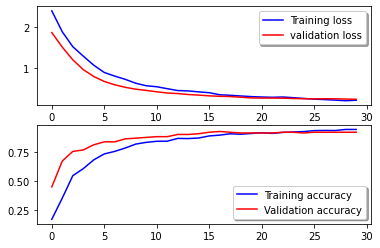

last Val_Accuracy =  0.9177215099334717


LearningRate= 0.01 Momentum= 0.7 HiddenUnit= 64


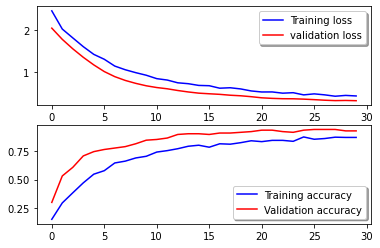

last Val_Accuracy =  0.9303797483444214


LearningRate= 0.01 Momentum= 0.7 HiddenUnit= 32


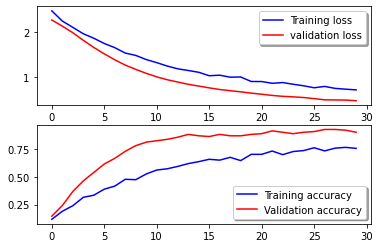

last Val_Accuracy =  0.8987341523170471


LearningRate= 0.03 Momentum= 0.9 HiddenUnit= 128


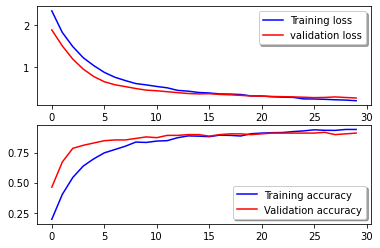

last Val_Accuracy =  0.9113923907279968


LearningRate= 0.03 Momentum= 0.9 HiddenUnit= 64


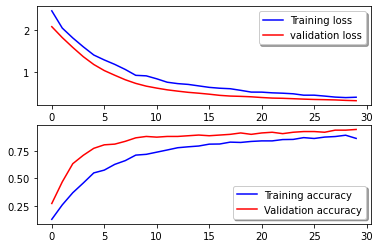

last Val_Accuracy =  0.9430379867553711


LearningRate= 0.03 Momentum= 0.9 HiddenUnit= 32


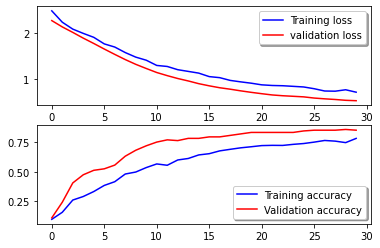

last Val_Accuracy =  0.8544303774833679


LearningRate= 0.03 Momentum= 0.7 HiddenUnit= 128


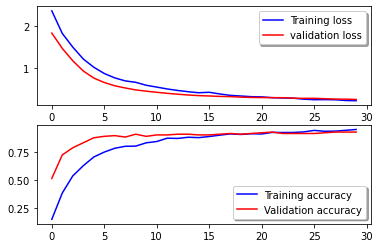

last Val_Accuracy =  0.9240506291389465


LearningRate= 0.03 Momentum= 0.7 HiddenUnit= 64


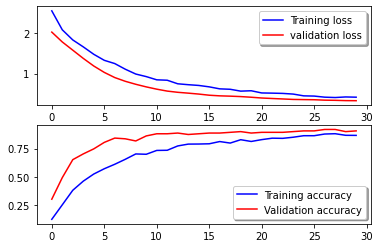

last Val_Accuracy =  0.905063271522522


LearningRate= 0.03 Momentum= 0.7 HiddenUnit= 32


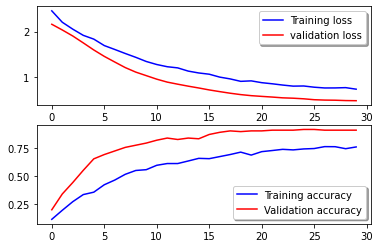

last Val_Accuracy =  0.905063271522522


LearningRate= 0.05 Momentum= 0.9 HiddenUnit= 128


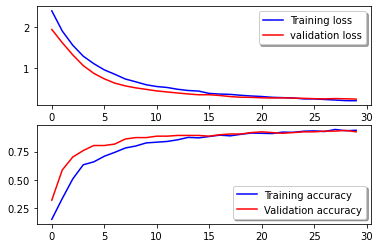

last Val_Accuracy =  0.9240506291389465


LearningRate= 0.05 Momentum= 0.9 HiddenUnit= 64


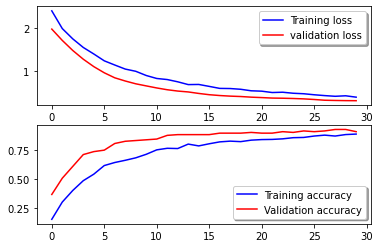

last Val_Accuracy =  0.905063271522522


LearningRate= 0.05 Momentum= 0.9 HiddenUnit= 32


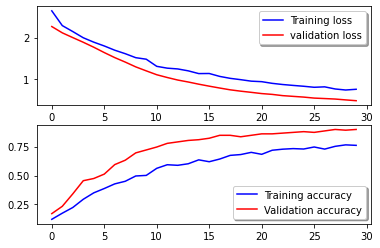

last Val_Accuracy =  0.8987341523170471


LearningRate= 0.05 Momentum= 0.7 HiddenUnit= 128


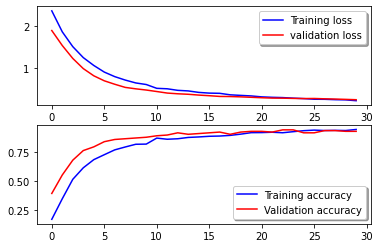

last Val_Accuracy =  0.9240506291389465


LearningRate= 0.05 Momentum= 0.7 HiddenUnit= 64


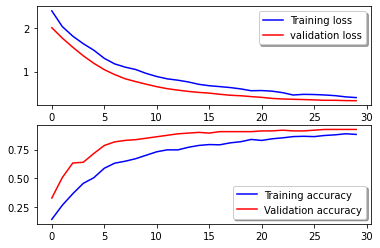

last Val_Accuracy =  0.9240506291389465


LearningRate= 0.05 Momentum= 0.7 HiddenUnit= 32


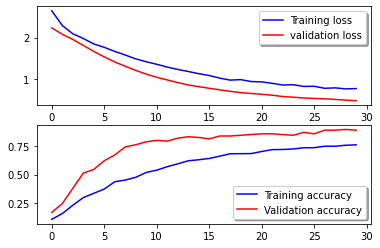

last Val_Accuracy =  0.8860759735107422




In [6]:
comparison = []

#以不同LearningRate, Momentum, HiddenUnit組合跑BPN，並將結果放進comparison
BPN(0.01, 0.9, 128, comparison)
BPN(0.01, 0.9, 64, comparison)
BPN(0.01, 0.9, 32, comparison)
BPN(0.01, 0.7, 128, comparison)
BPN(0.01, 0.7, 64, comparison)
BPN(0.01, 0.7, 32, comparison)

BPN(0.03, 0.9, 128, comparison)
BPN(0.03, 0.9, 64, comparison)
BPN(0.03, 0.9, 32, comparison)
BPN(0.03, 0.7, 128, comparison)
BPN(0.03, 0.7, 64, comparison)
BPN(0.03, 0.7, 32, comparison)

BPN(0.05, 0.9, 128, comparison)
BPN(0.05, 0.9, 64, comparison)
BPN(0.05, 0.9, 32, comparison)
BPN(0.05, 0.7, 128, comparison)
BPN(0.05, 0.7, 64, comparison)
BPN(0.05, 0.7, 32, comparison)

### (a) Show the numerical results and “DIAGRAM” from different perspectives (eg., MSE, convergence time, error of training data, error of testing data, etc.)

In [7]:
comparison_df = pd.DataFrame(comparison,columns=["LearningRate", "Momentum", "# of HiddenUnit", \
                                              'last loss','last val_loss','last accuracy','last val_accuracy'])

In [8]:
comparison_df

,LearningRate,Momentum,# of HiddenUnit,last loss,last val_loss,last accuracy,last val_accuracy
0,0.01,0.9,128,0.224591,0.248340,0.938732,0.943038
1,0.01,0.9,64,0.401586,0.313781,0.887324,0.911392
2,0.01,0.9,32,0.689385,0.442650,0.777465,0.867089
3,0.01,0.7,128,0.229092,0.252602,0.941549,0.917722
4,0.01,0.7,64,0.421730,0.307825,0.872535,0.930380
5,0.01,0.7,32,0.712167,0.471768,0.754225,0.898734
6,0.03,0.9,128,0.198025,0.263149,0.941549,0.911392
7,0.03,0.9,64,0.410818,0.328486,0.861972,0.943038
8,0.03,0.9,32,0.708354,0.523744,0.784507,0.854430
9,0.03,0.7,128,0.216740,0.246968,0.947183,0.924051


### (b) Please predict the digit No.1579 to No.1593 (data source: DRpredict.xlsx) using your best established BPN model in (a) and fill out the following table.

根據(a)val_acccucary最高的組合LearningRate=0.03, Momentum=0.9, HiddenUnit=128 訓練模型，
並利用訓練好的模型預測test 資料，結果如下

In [9]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=256))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, cY_train, validation_data=(X_val, cY_val), epochs=30 , batch_size=200, verbose=0)


Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

i = 1579
for c in Y_pred_classes:
    print("No.", i," , prediction =",c)
    i += 1

No. 1579  , prediction = 4
No. 1580  , prediction = 0
No. 1581  , prediction = 5
No. 1582  , prediction = 6
No. 1583  , prediction = 5
No. 1584  , prediction = 0
No. 1585  , prediction = 5
No. 1586  , prediction = 0
No. 1587  , prediction = 2
No. 1588  , prediction = 5
No. 1589  , prediction = 7
No. 1590  , prediction = 0
No. 1591  , prediction = 2
No. 1592  , prediction = 5
No. 1593  , prediction = 7


印出test資料的圖片對比上述prediction結果

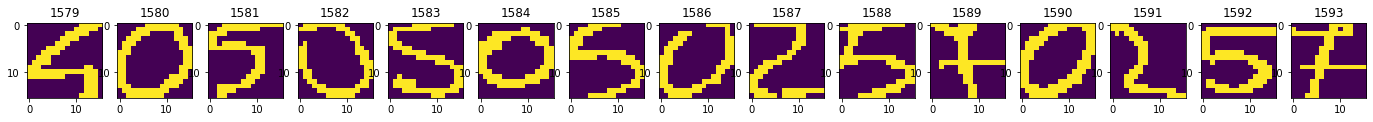

In [10]:
X_test2 = X_test.values.reshape(X_test.shape[0], 16, 16, 1)
w=10
h=10
fig=plt.figure(figsize=(24, 24))
columns = 15
rows = 1
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_test2[i-1][:,:,0])
    plt.title(i+1578)
plt.show()